In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import os
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sequentia.classifiers import DTWKNN
from sequentia.preprocessing import downsample, fft, normalize
rng = np.random.RandomState(72)

In [2]:
data = None
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/mixoutALL_shifted.mat'

try:
    path = os.path.join(os.getcwd(), 'temp.mat')
    response = requests.get(url)
except:
    raise
else:
    with open(path, 'wb') as file:
        file.write(response.content)
        data = loadmat(path)
finally:
    os.remove(path)

In [8]:
X = downsample([x.T for x in data['mixout'][0]], n=4, method='average')

In [9]:
get_char = lambda idx: data['consts'][0][0][3][0][idx - 1][0]
y = [get_char(label) for label in data['consts'][0][0][4][0]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)

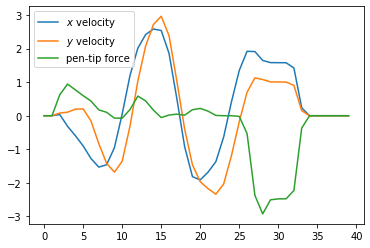

In [11]:
plt.plot(X_train[0])
plt.legend(labels=['$x$ velocity', '$y$ velocity', 'pen-tip force'])

In [13]:
clf = DTWKNN(k=1, radius=1)
clf.fit(X_train, y_train)

In [14]:
clf.predict(X_test[0])

TypeError: boolean() missing 1 required positional argument: 'desc'